In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import pandas_datareader as pdr
from pandas_datareader import wb

import plotly.graph_objs as go
import plotly.express as px

from datetime import date
import time

In [ ]:
end = date.today()
print(f"Year = {end.year} month = {end.month} day = {end.day}")
start = date(year=end.year - 50, month=end.month, day=end.day)
print(f"Period for year: {start} to {end}")

Year = 2025 month = 3 day = 18
Period for year: 1975-03-18 to 2025-03-18


## Understanding Data-Driven Decisions

### 1. GDP

## Calculating Year-over-Year (YoY) and Quarter-over-Quarter (QoQ) Growth for India's GDP
* we fetches India's GDP data from the **World Bank** using the `pandas_datareader` library and calculates the **Year-over-Year (YoY)** and **Quarter-over-Quarter (QoQ)** growth rates for India's GDP.




In [ ]:
india_gdp = wb.download(indicator="NY.GDP.MKTP.CD", country="IN", start=start,end=end)
india_gdp.head()

<ipython-input-17-87c53e3d7174>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  india_gdp = wb.download(indicator="NY.GDP.MKTP.CD", country="IN", start=start,end=end)


NY.GDP.MKTP.CD
country year                
India   2023    3.567552e+12
        2022    3.353470e+12
        2021    3.167271e+12
        2020    2.674852e+12
        2019    2.835606e+12

## Explanation of **YoY** and **QoQ** Growth

### **YoY(Year-over-Year)** is a comparison of a metric (like GDP, revenue, or sales) between the current period and the same period from the previous year. It is used to assess long-term performance and trends, eliminating seasonal effects.
---

### **QoQ (Quarter-over-Quarter)** compares a metric between two consecutive quarters. It helps track short-term changes and trends over a shorter period

---


In [ ]:
# Calculate Year-over-Year (YoY) Growth
india_gdp['india_gdp_yoy'] = india_gdp['NY.GDP.MKTP.CD'] / india_gdp['NY.GDP.MKTP.CD'].shift(4) - 1

# Calculate Quarter-over-Quarter (QoQ) Growth
india_gdp['india_gdp_qoq'] = india_gdp['NY.GDP.MKTP.CD'] / india_gdp['NY.GDP.MKTP.CD'].shift(1) - 1

india_gdp.tail()

NY.GDP.MKTP.CD  india_gdp_yoy  india_gdp_qoq
country year                                              
India   1979    1.529954e+11      -0.299029      -0.178894
        1978    1.373023e+11      -0.315936      -0.102572
        1977    1.214866e+11      -0.372134      -0.115189
        1976    1.027165e+11      -0.448735      -0.154504
        1975    9.847383e+10      -0.356361      -0.041304

In [ ]:
len(india_gdp.index.get_level_values('year'))

49

<ipython-input-20-6c9371d64fae>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year, rotation=45)


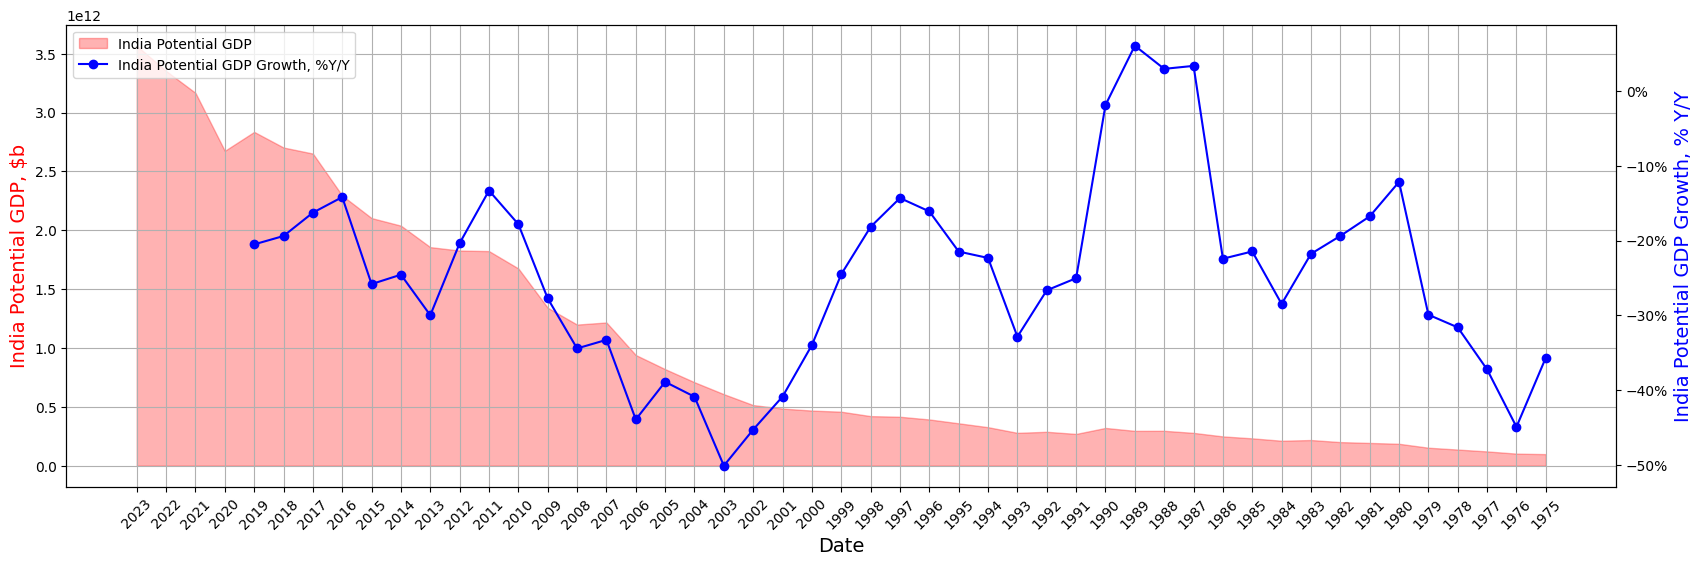

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

gdp_values = india_gdp['NY.GDP.MKTP.CD']

# Convert DatetimeIndex to numerical values for x-axis
x_values = np.arange(len(india_gdp.index))
year = india_gdp.index.get_level_values('year')
ax.fill_between(india_gdp.index.get_level_values('year'), gdp_values, color="red", alpha=0.3, label="India Potential GDP")

ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(x_values, india_gdp.india_gdp_yoy, color='blue', marker='o',label='India Potential GDP Growth, %Y/Y')

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_xticklabels(year, rotation=45)
ax.set_ylabel("India Potential GDP, $b", color="red", fontsize=14)
ax2.set_ylabel("India Potential GDP Growth, % Y/Y", color="blue", fontsize=14)


# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### 2.Inflation CPI(Consumer Price Index)

In [ ]:
india_cpi = wb.download(indicator="FP.CPI.TOTL.ZG", country="IN", start=start, end=end)
india_cpi.head()

<ipython-input-21-328c9116fb61>:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  india_cpi = wb.download(indicator="FP.CPI.TOTL.ZG", country="IN", start=start, end=end)


FP.CPI.TOTL.ZG
country year                
India   2023        5.649143
        2022        6.699034
        2021        5.131407
        2020        6.623437
        2019        3.729506

In [ ]:
india_cpi['cpi_core_yoy'] = india_cpi['FP.CPI.TOTL.ZG']/india_cpi['FP.CPI.TOTL.ZG'].shift(12)-1
india_cpi['cpi_core_mom'] = india_cpi['FP.CPI.TOTL.ZG']/india_cpi['FP.CPI.TOTL.ZG'].shift(1)-1

india_cpi.tail(13)

FP.CPI.TOTL.ZG  cpi_core_yoy  cpi_core_mom
country year                                            
India   1987        8.801126      0.884682     -0.062061
        1986        8.729721     -0.340199     -0.008113
        1985        5.556424     -0.224424     -0.363505
        1984        8.318907     -0.073325      0.497169
        1983       11.868081      0.160705      0.426639
        1982        7.890743     -0.230016     -0.335129
        1981       13.112547      1.072510      0.661763
        1980       11.346073     -0.037475     -0.134716
        1979        6.275683     -0.547543     -0.446885
        1978        2.523049     -0.718762     -0.597964
        1977        8.307470      0.174320      2.292632
        1976       -7.633948     -1.813553     -1.918926
        1975        5.748430     -0.346853     -1.753009

<ipython-input-9-ecc5e9c6508a>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year, rotation=45)


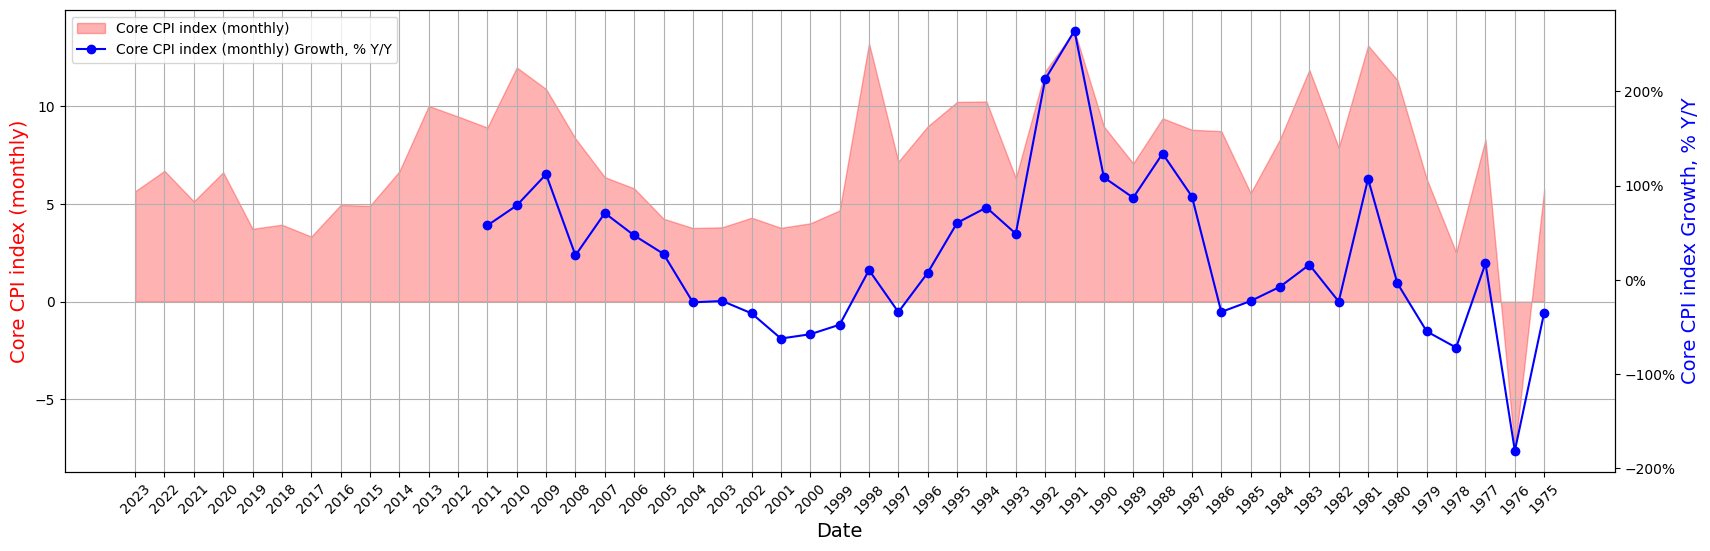

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under CPI
ax.fill_between(india_cpi.index.get_level_values('year'), india_cpi['FP.CPI.TOTL.ZG'], color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for CPI growth percentage
ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(india_cpi.index.get_level_values('year'), india_cpi.cpi_core_yoy, color="blue", marker="o", label="Core CPI index (monthly) Growth, % Y/Y") # Changed line

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_xticklabels(year, rotation=45)
ax.set_ylabel("Core CPI index (monthly)", color="red", fontsize=14)
ax2.set_ylabel("Core CPI index Growth, % Y/Y", color="blue", fontsize=14)


# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

### 3. Interest Rates

In [ ]:
!pip install wbdata
import wbdata
import pandas as pd


# Define the indicator and country
indicator = {'FR.INR.RINR': 'Repo Rate'}  # Replace with the correct indicator code for India's repo rate
country = 'IN'

# Fetch the data
india_repo_rate = wbdata.get_dataframe(indicator, country=country)
#india_repo_rate = india_repo_rate.sort_index()
#india_repo_rate = india_repo_rate[start:]

# Display the tail of the DataFrame
india_repo_rate.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
bigframes 1.40.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.2.1 which is incompatible.


,Repo Rate
date,
2023,NaN
2022,1.704611
2021,0.316945
2020,4.136000
2019,6.894875


In [ ]:
df = pd.read_excel(r'/content/Other Macroeconomic Indicators.xlsx')  # Use read_excel for xlsx files

In [ ]:
df.columns
india_repo_rate = df[['Unnamed: 1','Unnamed: 4']]
india_repo_rate.columns = ['Date','Repo Rate']
india_repo_rate.drop(india_repo_rate.index[0],axis=0,inplace=True)
india_repo_rate.head()

In [ ]:
indicator = {'FR.INR.RINR': 'Repo Rate'}
country = 'IN'

# Fetch the data using wbdata.get_dataframe() instead of pdr.DataReader()
india_bond_yield = wbdata.get_dataframe(indicator, country=country)
india_bond_yield.index = pd.to_datetime(india_bond_yield.index)

print(india_bond_yield.tail())

### 4. Nifty

In [ ]:
nifty = yf.download('^NSEI', start=start, end=end)
nifty.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0


In [ ]:
# 252 trading days a year
  # REVERSE ORDER OF THE DATA!!!
nifty['nifty_dod'] = (nifty.Close/nifty.Close.shift(-1)-1)
nifty['nifty_qoq'] = (nifty.Close/nifty.Close.shift(-63)-1)
nifty['nifty_yoy'] = (nifty.Close/nifty.Close.shift(-252)-1)

In [ ]:
nifty.head()

Price,Close,High,Low,Open,Volume,nifty_dod,nifty_qoq,nifty_yoy
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
Date,,,,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0,-0.011339,-0.221975,0.064314
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0,-0.039336,-0.208296,0.101602
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0,-0.003202,-0.177147,0.137242
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0,-0.018604,-0.176702,0.154967
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0,-0.019190,-0.191735,0.213864


In [ ]:
nifty_truncated = nifty[nifty.index>='1990-01-01']
nifty_truncated.head()

Price,Close,High,Low,Open,Volume,nifty_dod,nifty_qoq,nifty_yoy
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,
Date,,,,,,,,
2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0,-0.011339,-0.221975,0.064314
2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0,-0.039336,-0.208296,0.101602
2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0,-0.003202,-0.177147,0.137242
2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0,-0.018604,-0.176702,0.154967
2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0,-0.019190,-0.191735,0.213864


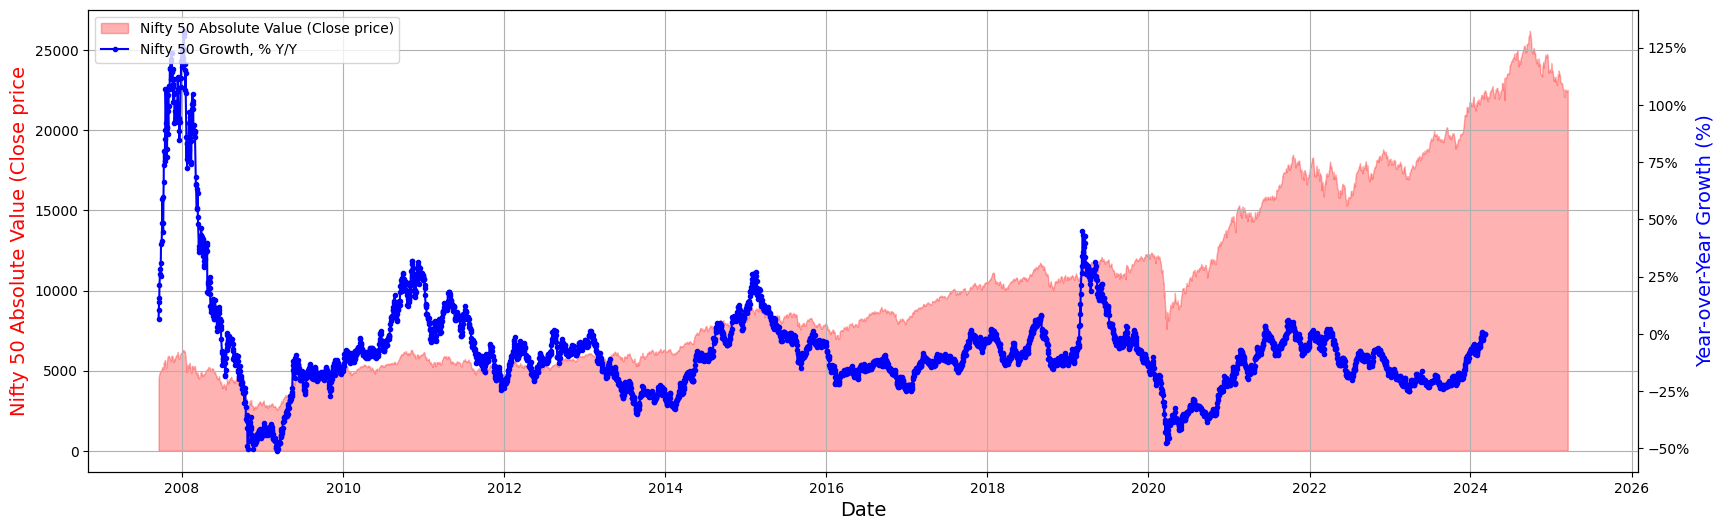

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

y_values = nifty_truncated.Close.values.ravel()
ax.fill_between(nifty_truncated.index, y_values, color="red", alpha=0.3, label="Nifty 50 Absolute Value (Close price)")

ax2 = ax.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.plot(nifty_truncated.nifty_yoy, color='blue',marker='.',label='Nifty 50 Growth, % Y/Y')

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Nifty 50 Absolute Value (Close price", color="red", fontsize=14)
ax2.set_ylabel("Year-over-Year Growth (%)", color="blue", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [ ]:
nifty_truncated.index

DatetimeIndex(['2007-09-17', '2007-09-18', '2007-09-19', '2007-09-20',
               '2007-09-21', '2007-09-24', '2007-09-25', '2007-09-26',
               '2007-09-27', '2007-09-28',
               ...
               '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06',
               '2025-03-07', '2025-03-10', '2025-03-11', '2025-03-12',
               '2025-03-13', '2025-03-17'],
              dtype='datetime64[ns]', name='Date', length=4290, freq=None)

## Data Sources for Stocks
### 1. OHLCV data daily - INDEXES

In [ ]:
# Download historical data for BSE 100 index
bse100_daily = yf.download(tickers="^BSESN",
                           period="max",
                           interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
bse100_daily.tail()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2025-03-11,74102.320312,74195.171875,73663.601562,73743.882812,11700
2025-03-12,74029.757812,74392.148438,73598.156250,74270.812500,13800
2025-03-13,73828.906250,74401.109375,73770.593750,74392.539062,9900
2025-03-17,74169.953125,74376.351562,73796.062500,73830.031250,7400
2025-03-18,75301.257812,75385.757812,74480.148438,74608.656250,0


In [ ]:
# normally 252 trading days
bse100_daily['close_last_year'] = bse100_daily['Close'].shift(252)

# Use pandas Series division to ensure 1D result
bse100_daily['yoy_growth'] = (bse100_daily['Close']) / ( bse100_daily['Close'].shift(252)  - 1).astype(float)


In [ ]:
bse100_daily

Price,Close,High,Low,Open,Volume,close_last_year,yoy_growth
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,,
Date,,,,,,,
1997-07-01,4300.859863,4301.770020,4247.660156,4263.109863,0,NaN,NaN
1997-07-02,4333.899902,4395.310059,4295.399902,4302.959961,0,NaN,NaN
1997-07-03,4323.459961,4393.290039,4299.970215,4335.790039,0,NaN,NaN
1997-07-04,4323.819824,4347.589844,4300.580078,4332.700195,0,NaN,NaN
1997-07-07,4291.450195,4391.009766,4289.490234,4326.810059,0,NaN,NaN
...,...,...,...,...,...,...,...
2025-03-11,74102.320312,74195.171875,73663.601562,73743.882812,11700,NaN,1.004854
2025-03-12,74029.757812,74392.148438,73598.156250,74270.812500,13800,NaN,1.002145


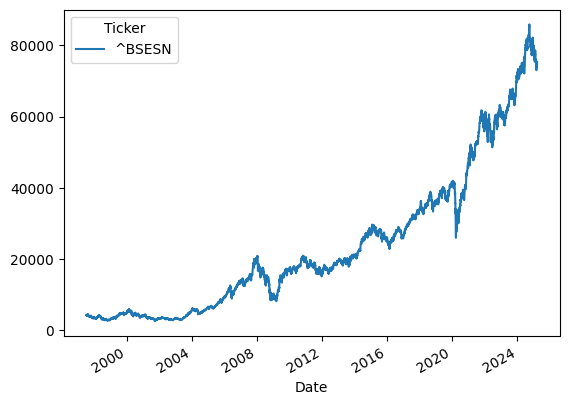

In [ ]:
bse100_daily['Close'].plot.line()
plt.show()

In [ ]:
# Download historical data for the Nifty 50 index (daily data)
nifty50_daily = yf.download(tickers="^NSEI",
                            period="max",
                            interval="1d")

nifty50_daily.tail()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2025-03-11,22497.900391,22522.099609,22314.699219,22345.949219,347900
2025-03-12,22470.500000,22577.400391,22329.550781,22536.349609,369700
2025-03-13,22397.199219,22558.050781,22377.349609,22541.500000,287500
2025-03-17,22508.750000,22577.000000,22353.150391,22353.150391,251100
2025-03-18,22834.300781,22857.800781,22599.199219,22662.250000,0


### OHLCV data daily EFTs

In [ ]:
# Download historical data for the Nifty 50 ETF (NIFTYBEES)
niftybees_etf = yf.download(tickers = "NIFTYBEES.NS",
                            period = "max",
                            interval = "1d")

niftybees_etf.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS
Date,,,,,
2009-01-02,30.556000,30.945000,30.299999,30.600000,1344830
2009-01-05,31.174999,31.370001,30.700001,30.700001,2429180
2009-01-06,31.124001,31.480000,30.603001,31.100000,1418730
2009-01-07,29.264999,31.500000,28.900000,31.379999,5724640
2009-01-09,28.855000,29.500000,28.030001,29.000000,1820800


In [ ]:
# WisdomTree India Earnings Fund (EPI)
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
epi_etf_daily.head()


Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2008-02-26,21.446676,21.536858,21.069557,21.249918,813800
2008-02-27,21.372896,21.536862,21.200733,21.422085,881900
2008-02-28,21.069569,21.340112,21.036775,21.299119,1037000
2008-02-29,20.339909,20.766219,20.274322,20.766219,854700
2008-03-03,19.790627,19.946394,19.577471,19.864411,610000


In [ ]:
# find dividends impact on Close vs. Adj.Close
epi_etf_daily[(epi_etf_daily.index >='2023-06-23') & (epi_etf_daily.index <='2023-06-28')]


Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2023-06-23,33.870712,34.000143,33.781107,33.880667,344100
2023-06-26,33.990395,34.070182,33.960471,34.020314,634600
2023-06-27,34.219791,34.219791,34.140000,34.189868,417100
2023-06-28,34.439209,34.439209,34.299578,34.319526,454400


In [ ]:
# find dividends - diff for Close vs. Adj Close
# Open/Close for 06-25 diff is close to divs = 1.845 (~1.58 for Open and 1.3 for Close)
# HELP: https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.
epi_etf_daily[(epi_etf_daily.index >='2022-06-23') & (epi_etf_daily.index <='2022-06-28')]


Price,Close,High,Low,Open,Volume
Ticker,EPI,EPI,EPI,EPI,EPI
Date,,,,,
2022-06-23,29.226183,29.282387,29.038835,29.160610,607700
2022-06-24,29.768791,29.778748,29.370547,29.420327,387900
2022-06-27,29.579622,29.689140,29.529842,29.669227,225400
2022-06-28,29.290897,29.629406,29.261028,29.579624,466600


<Axes: title={'center': "EPI's etf stock price"}, xlabel='Date'>

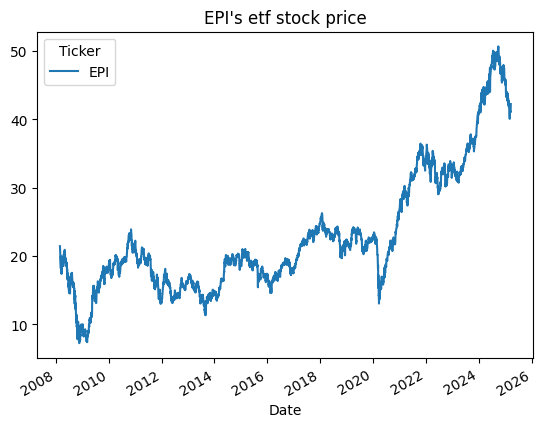

In [ ]:
# About yFinance: https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html

epi_etf_daily['Close'].plot(title="EPI's etf stock price")

In [ ]:
# get actions, incl. dividends - as a dataFrame
epi = yf.Ticker('EPI')
epi.get_actions()

,Dividends,Stock Splits,Capital Gains
Date,,,
2008-12-22 00:00:00-05:00,0.091,0.0,0.0
2009-03-23 00:00:00-04:00,0.007,0.0,0.0
2009-06-22 00:00:00-04:00,0.002,0.0,0.0
2009-09-21 00:00:00-04:00,0.045,0.0,0.0
2009-12-21 00:00:00-05:00,0.006,0.0,0.0
2010-06-28 00:00:00-04:00,0.065,0.0,0.0
2010-09-20 00:00:00-04:00,0.065,0.0,0.0
2010-12-22 00:00:00-05:00,0.013,0.0,0.0
2011-06-22 00:00:00-04:00,0.062,0.0,0.0


In [ ]:
# get dividends as Series
epi.get_dividends()

,Dividends
Date,
2008-12-22 00:00:00-05:00,0.091
2009-03-23 00:00:00-04:00,0.007
2009-06-22 00:00:00-04:00,0.002
2009-09-21 00:00:00-04:00,0.045
2009-12-21 00:00:00-05:00,0.006
2010-06-28 00:00:00-04:00,0.065
2010-09-20 00:00:00-04:00,0.065
2010-12-22 00:00:00-05:00,0.013
2011-06-22 00:00:00-04:00,0.062


### Macroeconomics

In [ ]:
import yfinance as yf

# Download historical data for the GOLDBEES ETF (Indian gold ETF)
goldbees_data = yf.download(tickers="GOLDBEES.NS",
                            period="max",  # Max period to get the longest available data
                            interval="1d")  # Interval of 1 day (daily data)

# Display the first few rows of the data
print(goldbees_data.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open      Volume
Ticker     GOLDBEES.NS GOLDBEES.NS GOLDBEES.NS GOLDBEES.NS GOLDBEES.NS
Date                                                                  
2009-01-02     13.3700       13.43     13.3000         0.0     1043400
2009-01-05     13.1555       13.32     13.1500         0.0     1294700
2009-01-06     13.0400       13.20     13.0201         0.0     1236000
2009-01-07     13.2150       13.25     13.0600         0.0     1109000
2009-01-09     13.1689       13.20     13.0600         0.0      723900


<Axes: xlabel='Date'>

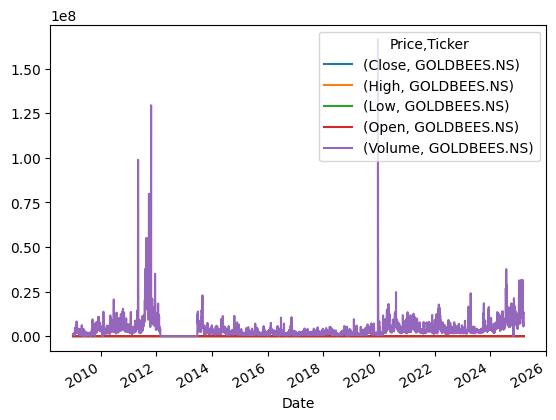

In [ ]:
goldbees_data.plot.line()

In [ ]:
import yfinance as yf


#  Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma (DCOILWTICO)
# Fetch Brent Crude Oil Prices (Brent Crude Futures)
brent_crude = yf.download("BZ=F",
                          start="2000-01-01",
                          end="2025-01-01",
                          interval="1d")

# Display the first few rows of the data
print(brent_crude.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open Volume
Ticker           BZ=F       BZ=F       BZ=F       BZ=F   BZ=F
Date                                                         
2007-07-30  75.739998  76.529999  75.440002  75.849998   2575
2007-07-31  77.050003  77.169998  75.669998  75.699997   3513
2007-08-01  75.349998  77.059998  74.860001  77.000000   3930
2007-08-02  75.760002  76.209999  74.269997  75.220001   6180
2007-08-03  74.750000  76.000000  74.529999  75.389999   4387


<Axes: xlabel='Date'>

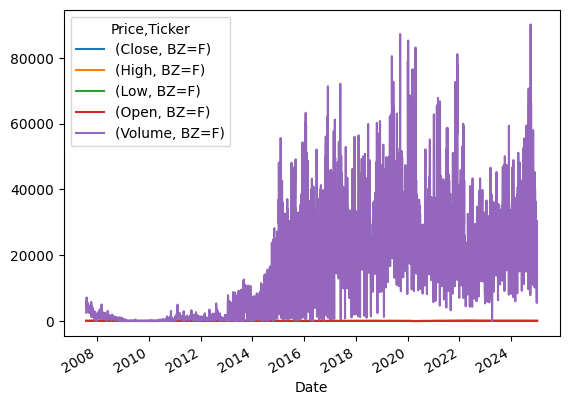

In [ ]:
brent_crude.plot.line()

In [ ]:
# web scraping for marco

import requests
from bs4 import BeautifulSoup

url = "https://tradingeconomics.com/india/indicators"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [ ]:
if response.status_code ==200:
  soup = BeautifulSoup(response.content, "html.parser")

  table_div = soup.find("div", class_="table-responsive")
  table = table_div.find("table")

  df = pd.read_html(str(table))[0]
  print(df)
else:
  print(f"Failed to retrieve the page. Status code: {response.status_code}")

                  Unnamed: 0      Last  Previous   Highest    Lowest  \
0                   Currency     86.64     86.66     88.10      0.01   
1               Stock Market  75301.00  74170.00  85978.00    113.00   
2            GDP Growth Rate      1.60      1.40     22.60    -22.80   
3     GDP Annual Growth Rate      6.20      5.60     22.60    -23.10   
4          Unemployment Rate      8.20      8.30     23.50      6.40   
5             Inflation Rate      3.61      4.31     12.17      1.54   
6              Interest Rate      6.25      6.50     14.50      4.00   
7         Cash Reserve Ratio      4.00      4.00     10.50      3.00   
8           Balance of Trade    -14.05    -22.99      0.71    -37.84   
9            Current Account -11200.00  -9700.00  19083.00 -31857.00   
10    Current Account to GDP     -1.20     -2.00      2.30     -4.80   
11    Government Debt to GDP     81.59     82.49     89.45     47.94   
12         Government Budget     -5.87     -6.45     -2.53     -

<ipython-input-99-31fb472d5dcb>:7: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


In [ ]:
df

,Unnamed: 0,Last,Previous,Highest,Lowest,Unnamed: 5,Unnamed: 6
0,Currency,86.64,86.66,88.10,0.01,NaN,Mar/25
1,Stock Market,75301.00,74170.00,85978.00,113.00,points,Mar/25
2,GDP Growth Rate,1.60,1.40,22.60,-22.80,percent,Dec/24
3,GDP Annual Growth Rate,6.20,5.60,22.60,-23.10,percent,Dec/24
4,Unemployment Rate,8.20,8.30,23.50,6.40,percent,Jan/25
5,Inflation Rate,3.61,4.31,12.17,1.54,percent,Feb/25
6,Interest Rate,6.25,6.50,14.50,4.00,percent,Feb/25
7,Cash Reserve Ratio,4.00,4.00,10.50,3.00,percent,Feb/25
8,Balance of Trade,-14.05,-22.99,0.71,-37.84,USD Billion,Feb/25
9,Current Account,-11200.00,-9700.00,19083.00,-31857.00,USD Million,Sep/24


### Financial Reporting

In [ ]:
reliance =  yf.Ticker('RELIANCE.NS')
tcs = yf.Ticker('TCS.NS')
infoys = yf.Ticker('INFY.NS')

In [ ]:
tcs.financials

,2024-03-31,2023-03-31,2022-03-31,2021-03-31
Tax Effect Of Unusual Items,-1924680000.0,277560000.0,238080000.0,-2821120000.0
Tax Rate For Calcs,0.258,0.257,0.256,0.256
Normalized EBITDA,685060000000.0,626000000000.0,569820000000.0,495640000000.0
Total Unusual Items,-7460000000.0,1080000000.0,930000000.0,-11020000000.0
Total Unusual Items Excluding Goodwill,-7460000000.0,1080000000.0,930000000.0,-11020000000.0
Net Income From Continuing Operation Net Minority Interest,459080000000.0,421470000000.0,383270000000.0,324300000000.0
Reconciled Depreciation,49850000000.0,50220000000.0,46040000000.0,40650000000.0
Reconciled Cost Of Revenue,1328710000000.0,1197590000000.0,1002670000000.0,868750000000.0
EBITDA,677600000000.0,627080000000.0,570750000000.0,484620000000.0
EBIT,627750000000.0,576860000000.0,524710000000.0,443970000000.0


In [ ]:
tcs.balance_sheet

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Treasury Shares Number,0.0,NaN,0.0,0.0,NaN
Ordinary Shares Number,3618087518.0,3659051373.0,3659051373.0,3699051373.0,NaN
Share Issued,3618087518.0,3659051373.0,3659051373.0,3699051373.0,NaN
Total Debt,80210000000.0,76880000000.0,78180000000.0,77950000000.0,NaN
Tangible Book Value,880870000000.0,876030000000.0,861180000000.0,841550000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,437080000000.0,451230000000.0,483010000000.0,383960000000.0,NaN
Other Short Term Investments,347010000000.0,380080000000.0,358450000000.0,315380000000.0,NaN
Cash And Cash Equivalents,90070000000.0,71150000000.0,124560000000.0,68580000000.0,NaN
Cash Equivalents,62120000000.0,49990000000.0,102770000000.0,15860000000.0,NaN


In [ ]:
tcs.basic_info

/usr/local/lib/python3.11/dist-packages/yfinance/base.py:242: DeprecationWarning: 'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'
  warnings.warn("'Ticker.basic_info' is deprecated and will be removed in future, Switch to 'Ticker.fast_info'", DeprecationWarning)


lazy-loading dict with keys = ['currency', 'dayHigh', 'dayLow', 'exchange', 'fiftyDayAverage', 'lastPrice', 'lastVolume', 'marketCap', 'open', 'previousClose', 'quoteType', 'regularMarketPreviousClose', 'shares', 'tenDayAverageVolume', 'threeMonthAverageVolume', 'timezone', 'twoHundredDayAverage', 'yearChange', 'yearHigh', 'yearLow']

### web scraping company for clusterinf

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://companiesmarketcap.com/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

response = requests.get(url, headers=headers)

In [ ]:
# Check if the request was successful (status code 200)
if response.status_code == 200:

    soup = BeautifulSoup(response.content, "html.parser")


    download_link = soup.find("a", {"rel": "nofollow", "href": "?download=csv"})


    if download_link:

        download_url = 'https://companiesmarketcap.com/'+download_link["href"]


        download_response = requests.get(download_url, headers=headers)


        if download_response.status_code == 200:

            with open("global_stocks.csv", "wb") as f:
                f.write(download_response.content)
            print("CSV file downloaded successfully.")
        else:
            print("Failed to download the CSV file.")
    else:
        print("Download link not found on the webpage.")
else:
    print("Failed to retrieve data from the webpage.")

CSV file downloaded successfully.


In [ ]:
global_stocks = pd.read_csv("/content/global_stocks.csv")


In [ ]:
global_stocks.head()


,Rank,Name,Symbol,marketcap,price (USD),country
0,1,Apple,AAPL,3195801698304,212.740,United States
1,2,Microsoft,MSFT,2845913382912,382.825,United States
2,3,NVIDIA,NVDA,2810855292928,115.199,United States
3,4,Amazon,AMZN,2040377245696,192.530,United States
4,5,Alphabet (Google),GOOG,1963207426048,162.270,United States
